# Simple Linear Regression (1)

Name: SAI AKHIL S N | Batch Date: 27 Jan 2021

#### Business Problem:
To Build a simple linear regression model to predict the delivery time using sorting time and select the best model using Python.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
# Loading the CSV file.
df = pd.read_csv('C://Users/oftog/Downloads/delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
# Correlation Matrix
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Text(0.5, 1.0, 'Delivery time vs Sorting time')

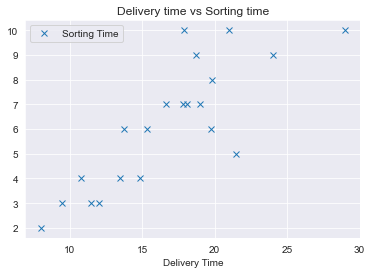

In [6]:
sns.set_style('darkgrid')
df.plot(x='Delivery Time',y='Sorting Time',style='x')
plt.title('Delivery time vs Sorting time')

From the above plot, the two variables i.e. delivery time and sorting time are Linear and positively correlated

In [7]:
x = df.iloc[:,1].values.reshape(-1,1)
y = df.iloc[:,0].values 

In [8]:
x

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [9]:
y

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

### Splitting the original dataset to test and train

In [10]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=42) 

### Model building

In [11]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train) 

LinearRegression()

In [12]:
print(f"coefficient --> {model.coef_}, y intercept --> {model.intercept_}")

coefficient --> [2.02424455], y intercept --> 4.682297962052008


C:\Users\oftog\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

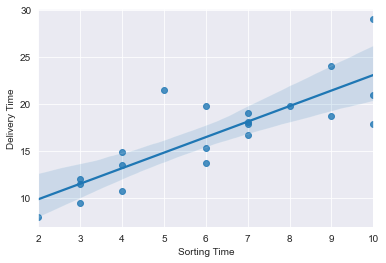

In [13]:
# Plotting the regression line
sns.regplot("Sorting Time","Delivery Time", data = df)

PREDICTED VALUES OF X TEST

In [14]:
#predicting the test dataset
y_pred = model.predict(x_test)
y_pred

array([24.9247435 , 18.85200984, 12.77927618, 12.77927618, 24.9247435 ])

In [15]:
# Dataset for actual and predicted values
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_pred 

,Actual,Predicted
0,21.00,24.924743
1,18.11,18.852010
2,14.88,12.779276
3,13.50,12.779276
4,17.90,24.924743


In [16]:
# Computing the mean absolute error and RMSE
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',
        metrics.mean_squared_error(y_test, y_pred))
print('R_Squared score(test):',
        metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.9025888966971176
Mean Squared Error: 14.046738956635016
R_Squared score(test): -1.0207599586367362


### Applying transformation techniques

In [17]:
# Quantile transformer
from sklearn.preprocessing import QuantileTransformer

In [18]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [25]:
qt = QuantileTransformer(random_state=0)
qtdf = qt.fit_transform(df)
qtdf = qt.transform(df)
df_qt = pd.DataFrame(data=qtdf, columns=['Delivery Time','Sorting Time'])
df_qt.head()

C:\Users\oftog\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (21). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


,Delivery Time,Sorting Time
0,0.85,1.000
1,0.25,0.225
2,0.75,0.450
3,0.95,0.825
4,1.00,1.000


In [27]:
x_qt=df_qt[['Delivery Time']].values
y_qt=df_qt['Sorting Time'].values

In [21]:
from sklearn.model_selection import train_test_split  
x_train_qt, x_test_qt, y_train_qt, y_test_qt = train_test_split(x_qt, y_qt, 
                            test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression  
model2 = LinearRegression()  
model2.fit(x_train_qt, y_train_qt) 

LinearRegression()

C:\Users\oftog\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

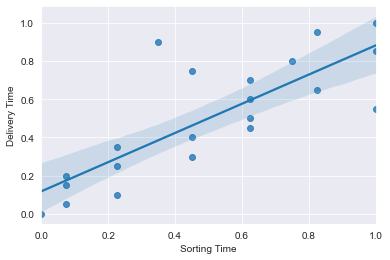

In [23]:
# Plotting the regression line
sns.regplot("Sorting Time","Delivery Time", data = df_qt)

In [29]:
# predictions using x_test
y_pred_qt = model2.predict(x_test_qt)

In [30]:
# Comparing Actual vs Predicted
df_final_qt = pd.DataFrame({'Actual': y_test_qt, 'Predicted': y_pred_qt})  
df_final_qt 

,Actual,Predicted
0,1.000,0.736867
1,0.625,0.545425
2,0.225,0.353983
3,0.225,0.277406
4,1.000,0.507137


In [31]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test_qt, y_pred_qt)) 
print('Mean Squared Error:',
        metrics.mean_squared_error(y_test_qt, y_pred_qt))
print('R_Squared score(test):',
        metrics.r2_score(y_test_qt, y_pred_qt))

Mean Absolute Error: 0.20339200586725337
Mean Squared Error: 0.06757359500312579
R_Squared score(test): 0.43758972115584027


### Linear regression using ols technique

In [48]:
df_ols=df.rename(columns={"Delivery Time":"Delivery_time","Sorting Time":"Sorting_time"})

In [49]:
df_ols.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [50]:
import statsmodels.formula.api as smf
model_ols=smf.ols('Delivery_time~Sorting_time',data=df_ols).fit()

In [51]:
model_ols.rsquared

0.6822714748417231

In [52]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        23:55:59   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Applying logarithmic transformations

In [53]:
model_log=smf.ols('np.log(Delivery_time)~np.log(Sorting_time)',data=df_ols).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Wed, 02 Jun 2021   Prob (F-statistic):           1.60e-07
Time:                           23:56:16   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Outlier detection to improve accuracy

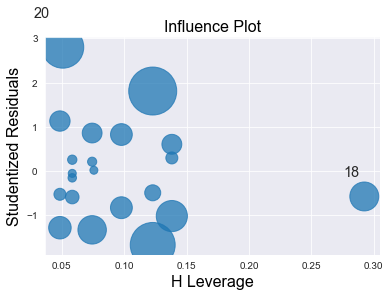

In [54]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_log)
plt.show()

In [55]:
# Cooks distance to detect outlier
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model_log.get_influence()
(c, _) = model_influence.cooks_distance

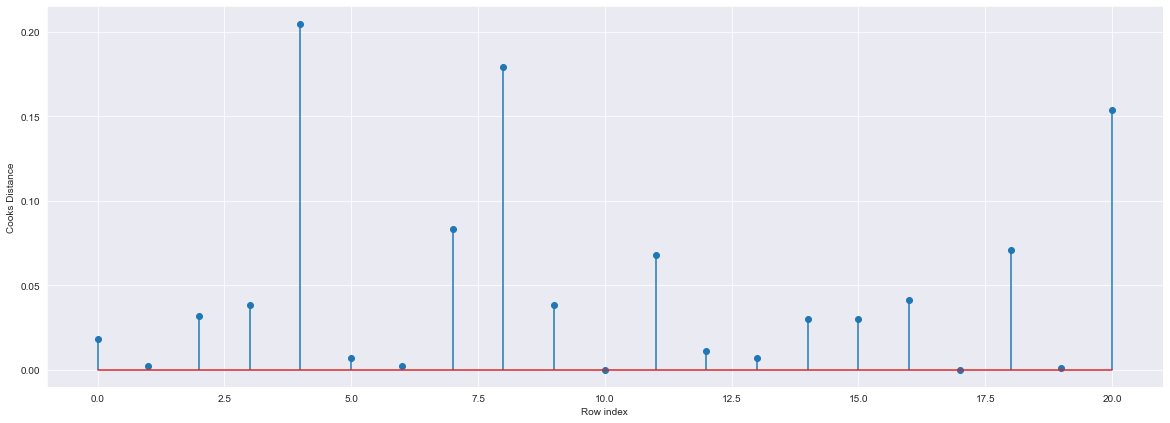

In [61]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df_ols)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [62]:
(np.argmax(c),np.max(c))

(4, 0.2046190331603357)

In [63]:
df_new=pd.read_csv('C://Users/oftog/Downloads/delivery_time.csv')

In [65]:
df_new1=df_new.drop(df_new.index[[8,20,4]],axis=0).reset_index()

In [66]:
df_new1.head()

,index,Delivery Time,Sorting Time
0,0,21.00,10
1,1,13.50,4
2,2,19.75,6
3,3,24.00,9
4,5,15.35,6


In [67]:
data1=df_new1.rename(columns={"Delivery Time":"Delivery_time","Sorting Time":"Sorting_time"})

In [71]:
model_new=smf.ols('Delivery_time~Sorting_time',data=data1).fit()

In [73]:
model_new.rsquared

0.8332330202945817

In [74]:
(model_new.rsquared,model_new.aic)

(0.8332330202945817, 74.89939393823053)

Thus, with some transformations and outlier detection, the Accuracy has been enhanced to 83%  